In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
#Doğruluk sınıflandırma puanı.Alt küme doğruluğunu hesaplar
 #Jupyter Notebook’a IDE’sine özel olarak yazılmış bir kod satırıdır.Oluşturulan görselleri görmek için her defasında plt.show() satırını yazmayı önlüyor 

In [2]:
data = pd.read_csv('Survey.csv') # Veri setini okuma 

In [3]:
data.head(10) 

,Age,Gender,State/ Union Territory,City,Monthly Family Income,Product Interested in Buying Online,Employment Status,You preferably use for shopping online,Have you heard about XPay ?
0,22,Female,West Bengal,Tier 1,10-30K,Books,Self-Employeed,Amazon,No
1,23,Male,West Bengal,Tier 1,50-70K,Mobile Accessories (including earphones and he...,9-5 Job,Flipkart,No
2,23,Male,West Bengal,Tier 2,10-30K,Mobile Accessories (including earphones and he...,Student,Flipkart,No
3,22,Male,West Bengal,Tier 3,10K and Below,Books,Student,Flipkart,No
4,24,Male,West Bengal,Tier 1,30-50K,Mobile Accessories (including earphones and he...,Student,Flipkart,Yes
5,23,Female,West Bengal,Tier 1,70K and Above,Mobile Accessories (including earphones and he...,9-5 Job,Amazon,No
6,22,Female,West Bengal,Tier 1,70K and Above,"Fashion Items ( Perfumes, Cosmetics etc)",Student,Amazon,No
7,22,Male,West Bengal,Tier 1,30-50K,Books,Student,Amazon,No
8,23,Male,West Bengal,Tier 2,30-50K,Mobile Accessories (including earphones and he...,Student,Flipkart,No
9,23,Female,West Bengal,Tier 2,30-50K,Books,9-5 Job,Flipkart,No


In [4]:
data.tail()  # son n satırı döndürmek için, default=5

,Age,Gender,State/ Union Territory,City,Monthly Family Income,Product Interested in Buying Online,Employment Status,You preferably use for shopping online,Have you heard about XPay ?
195,45,Female,West Bengal,Tier 3,10K and Below,"Fashion Items ( Perfumes, Cosmetics etc)",Self-Employeed,Flipkart,No
196,23,Male,West Bengal,Tier 1,70K and Above,Mobile Accessories (including earphones and he...,Student,Flipkart,No
197,60,Female,West Bengal,Tier 1,10-30K,Mobile Accessories (including earphones and he...,9-5 Job,Amazon,No
198,24,Male,West Bengal,Tier 1,50-70K,Mobile Accessories (including earphones and he...,Student,Flipkart,No
199,32,Female,Uttar Pradesh,Tier 2,50-70K,Online Bill Payments,Self-Employeed,Amazon,No


In [5]:
data.info() #dizin türü ve sütunlar, boş olmayan değerler ve bellek kullanımı dahil olmak üzere bir DataFrame hakkında bilgi.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
Age                                        200 non-null int64
Gender                                     200 non-null object
State/ Union Territory                     200 non-null object
City                                       200 non-null object
Monthly Family Income                      200 non-null object
Product Interested in Buying Online        200 non-null object
Employment Status                          200 non-null object
You preferably use  for shopping online    200 non-null object
Have you heard about XPay ?                200 non-null object
dtypes: int64(1), object(8)
memory usage: 14.1+ KB


In [6]:
pd.isnull(data).sum() #veri kümesindeki eksik değerlerin sayısını döndürür. 

Age                                        0
Gender                                     0
State/ Union Territory                     0
City                                       0
Monthly Family Income                      0
Product Interested in Buying Online        0
Employment Status                          0
You preferably use  for shopping online    0
Have you heard about XPay ?                0
dtype: int64

In [7]:
group_data = data.groupby(['Monthly Family Income', 'Product Interested in Buying Online']) #aylık gelire göre satın almaları grupluyoruz 

In [8]:
group_data.count() #Her sütun veya satır için NA olmayan hücreleri saymak için 

Age  \
Monthly Family Income Product Interested in Buying Online                       
10-30K                Books                                                13   
                      Electrical Appliances (Eg: AC, TV, Mixer Grinde...    3   
                      Fashion Items ( Perfumes, Cosmetics etc)              8   
                      Gadgets (Eg: Laptops, Mobiles, Desktop peripher...    4   
                      Home Accessories (Eg: Chair, Tables)                  2   
                      Mobile Accessories (including earphones and hea...   12   
                      Online Bill Payments                                  1   
                      Shoes                                                 7   
                      Watches                                               2   
10K and Below         Bags                                                  4   
                      Books                                                10   
                      Electrical Appliances (Eg: AC, TV, Mixer Grinde...    1   
                      Fashion Items ( Perfumes, Cosmetics etc)              5   
                      Gadgets (Eg: Laptops, Mobiles, Desktop peripher...    5   
                      Home Accessories (Eg: Chair, Tables)                  1   
                      Mobile Accessories (including earphones and hea...   11   
                      OTT Platform Subscriptions (Eg: Amazon Prime, N...    3   
30-50K                Bags                                                  2   
                      Books                                                18   
                      Electrical Appliances (Eg: AC, TV, Mixer Grinde...    2   
                      Fashion Items ( Perfumes, Cosmetics etc)              3   
                      Gadgets (Eg: Laptops, Mobiles, Desktop peripher...    5   
                      Home Accessories (Eg: Chair, Tables)                  2   
                      Mobile Accessories (including earphones and hea...    4   
                      OTT Platform Subscriptions (Eg: Amazon Prime, N...    4   
                      Shoes                                                 1   
                      Watches                                               1   
50-70K                Bags                                                  2   
                      Books                                                 6   
                      Electrical Appliances (Eg: AC, TV, Mixer Grinde...    2   
                      Fashion Items ( Perfumes, Cosmetics etc)              2   
                      Gadgets (Eg: Laptops, Mobiles, Desktop peripher...    6   
                      Home Accessories (Eg: Chair, Tables)                  1   
                      Mobile Accessories (including earphones and hea...    6   
                      OTT Platform Subscriptions (Eg: Amazon Prime, N...    4   
                      Online Bill Payments                                  2   
70K and Above         Books                                                 7   
                      Electrical Appliances (Eg: AC, TV, Mixer Grinde...    1   
                      Fashion Items ( Perfumes, Cosmetics etc)              4   
                      Gadgets (Eg: Laptops, Mobiles, Desktop peripher...   11   
                      Mobile Accessories (including earphones and hea...    5   
                      OTT Platform Subscriptions (Eg: Amazon Prime, N...    5   
                      Shoes                                                 2   

                                                                          Gender  \
Monthly Family Income Product Interested in Buying Online                          
10-30K                Books                                                   13   
                      Electrical Appliances (Eg: AC, TV, Mixer Grinde...       3   
                      Fashion Items ( Perfumes, Cosmetics etc)                 8   
        

Veri setini incelediğimizde 10K ve 70K altı	gelire sahip kişilerin genellikle kitap aldıkları ,70K and üzeri kişilerin genellikle elektronik alışverişi yaptıkları görülmekte . 

In [9]:
group_data_age = data.groupby(['Product Interested in Buying Online'])
mean_age = group_data_age['Age'].mean()  
#ürün alırken yaş faktörünün etkisi için 

In [10]:
mean_age

Product Interested in Buying Online
Bags                                                          46.500000
Books                                                         30.055556
Electrical Appliances (Eg: AC, TV, Mixer Grinder etc)         44.000000
Fashion Items ( Perfumes, Cosmetics etc)                      32.181818
Gadgets (Eg: Laptops, Mobiles, Desktop peripherals etc)       31.064516
Home Accessories (Eg: Chair, Tables)                          39.000000
Mobile Accessories (including earphones and headphones)       33.289474
OTT Platform Subscriptions (Eg: Amazon Prime, Netflix etc)    31.937500
Online Bill Payments                                          26.333333
Shoes                                                         39.400000
Watches                                                       23.000000
Name: Age, dtype: float64

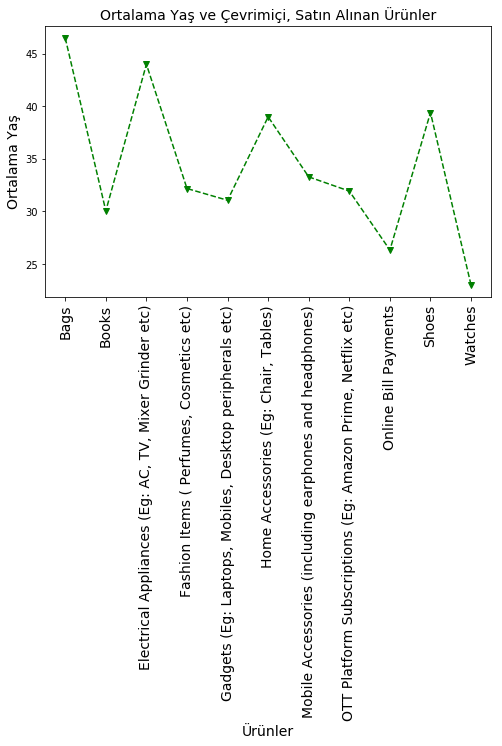

In [11]:
colors = {'Male':'tab:blue', 'Female':'tab:orange'}

plt.figure(figsize=(8, 5))
plt.plot(mean_age, 'gv--')
plt.xticks(rotation=90, fontsize=14)
plt.title('Ortalama Yaş ve Çevrimiçi, Satın Alınan Ürünler', fontsize=14)
plt.xlabel('Ürünler', fontsize=14)
plt.ylabel('Ortalama Yaş', fontsize=14)
plt.show()

Cinsiyetin yaşla birlikte pazarı nasıl etkilediğini görelim.

In [12]:
new_data = pd.concat([data['Gender'], data['Age'], data['Product Interested in Buying Online']], axis=1)#concat: iki veya daha fazla diziyi birleştirmek için kullanılır.
new_group_male = new_data[new_data.Gender=='Male'].groupby('Product Interested in Buying Online') # erkek 
new_group_female = new_data[new_data.Gender=='Female'].groupby('Product Interested in Buying Online')

In [13]:
age_male = new_group_male['Age'].mean() # cinsiyet için yapılan grupları yaşlarla birleştirdik
age_female = new_group_female['Age'].mean()

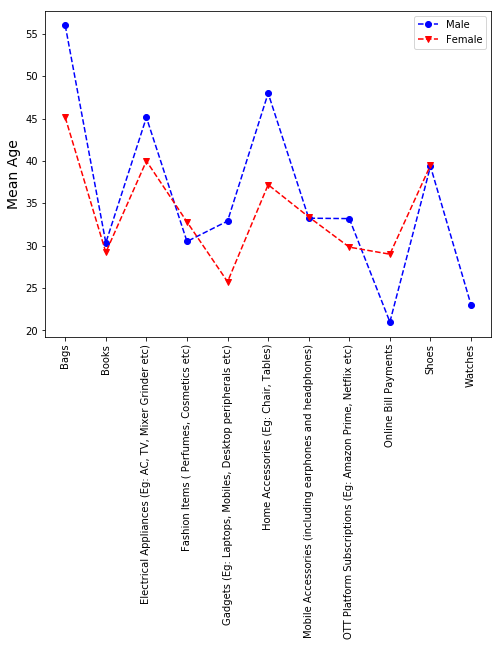

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(age_male, 'bo--')
plt.plot(age_female, 'rv--')
plt.xticks(rotation=90)
plt.ylabel('Mean Age', fontsize=14)
plt.legend(labels=('Male', 'Female'))
plt.show()

Bu tabloya göre;
 Moda Ürünleri genellikle yaş bakımından daha büyük kadınlar tarafından ,
 Mobil Aksesuarlar, Kitaplar ve Ayakkabılar yaş ort si neredeyse aynı olan kadın ve erkekler tarafından ,
 Diğerlerinde erkeklerin yaş ort si daha büyüktür

Şehir faktörünün etkisi

In [15]:
pie_chart = [] # yuvarkal tablo için

In [16]:
num = data[data.City=='Tier 1'].count()
pie_chart.append(num.Age)

num = data[data.City=='Tier 2'].count()
pie_chart.append(num.Age)

num = data[data.City=='Tier 3'].count()
pie_chart.append(num.Age)  

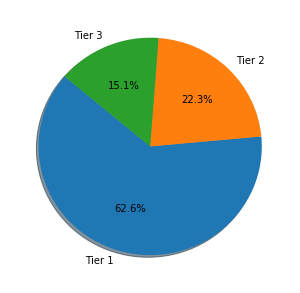

In [22]:
labes = 'Tier 1', 'Tier 2', 'Tier 3'
plt.figure(figsize=(5, 5)) 
plt.pie(pie_chart, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140) 
plt.show()

In [23]:
group_tier1 = data[data.City=='Tier 1'].groupby('Product Interested in Buying Online')
group_tier2 = data[data.City=='Tier 2'].groupby('Product Interested in Buying Online')
group_tier3 = data[data.City=='Tier 3'].groupby('Product Interested in Buying Online')

In [24]:
new_list = data['Product Interested in Buying Online'].unique()

Tier_1, Tier_2, Tier_3 = [], [], []
labels2, labels3 = [], []

for i in new_list:
    Tier_1.append(group_tier1.get_group(i).Age.count())
    
for i in new_list:
    if i=='Shoes':
        pass
    else:
        labels2.append(i)
        Tier_2.append(group_tier2.get_group(i).Age.count())
        
for i in new_list:
    if i=='Shoes' or i=='Electrical Appliances (Eg: AC, TV, Mixer Grinder etc)' or i=='Watches' or i=='Home Accessories (Eg: Chair, Tables)':
        pass
    else:
        labels3.append(i)
        Tier_3.append(group_tier3.get_group(i).Age.count())

Öğelerin bu 3 Şehir katmanında (ayrı ayrı) nasıl dağıtıldığına  bakalım

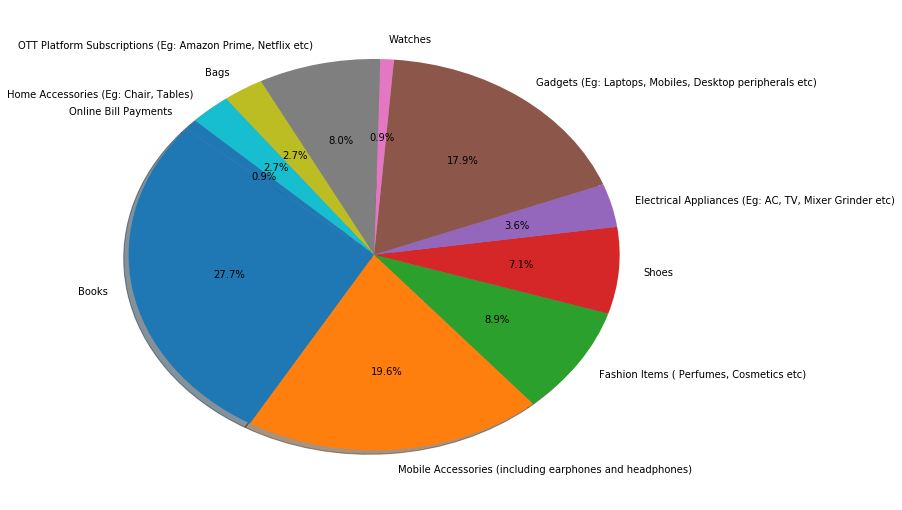

In [27]:
# sehir 1

labels = new_list

plt.figure(figsize=(11, 9))
plt.pie(Tier_1, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

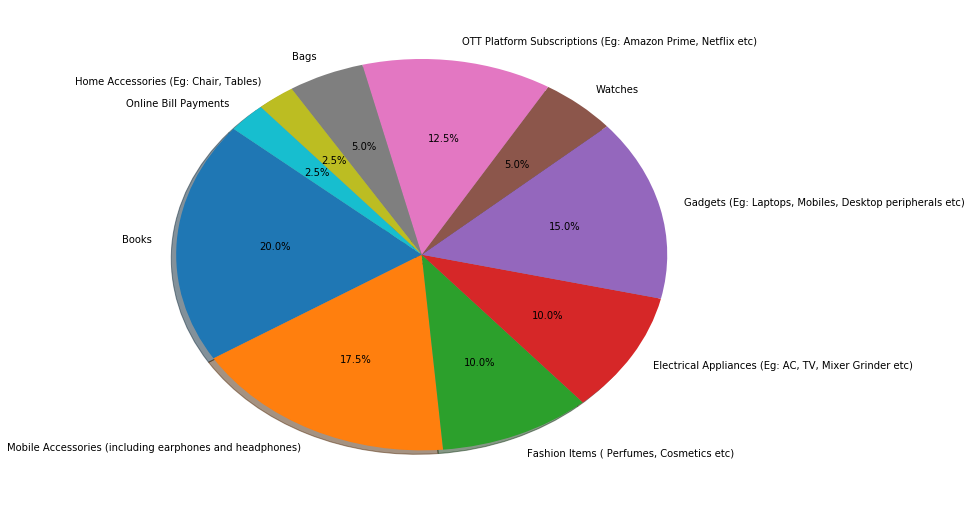

In [30]:
# şehir 2
labels = labels2

plt.figure(figsize=(11,9))
plt.pie(Tier_2, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

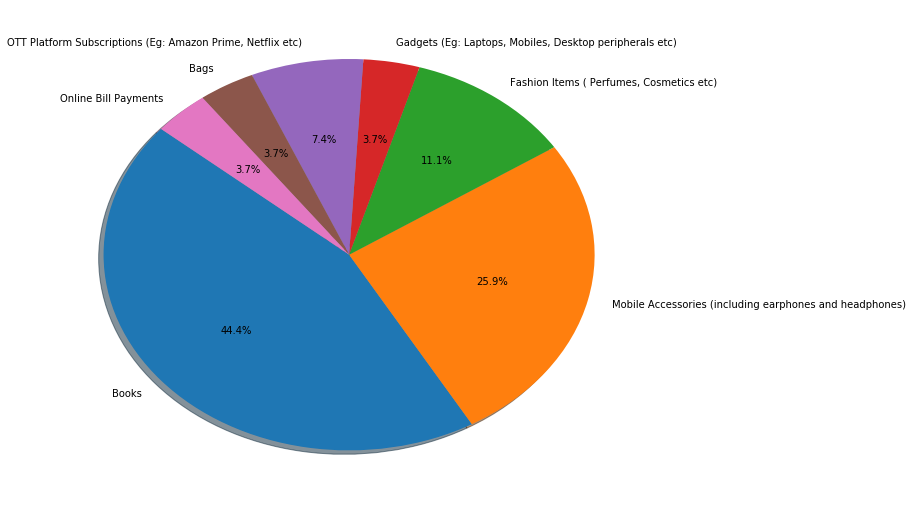

In [32]:
#şehir 3
labels = labels3

plt.figure(figsize=(11,9))
plt.pie(Tier_3, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

 İstihdam Durumuna Göre Dağılım

In [34]:
group_emp = data.groupby(['Product Interested in Buying Online', 'Employment Status'])

In [35]:
group_emp.count()

Age  \
Product Interested in Buying Online                Employment Status        
Bags                                               9-5 Job              1   
                                                   Business             1   
                                                   Housewife            2   
                                                   Retired              1   
                                                   Self-Employeed       3   
Books                                              9-5 Job              8   
                                                   Business             7   
                                                   Retired              1   
                                                   Self-Employeed       7   
                                                   Student             31   
Electrical Appliances (Eg: AC, TV, Mixer Grinde... 9-5 Job              5   
                                                   Self-Employeed       3   
                                                   Student              1   
Fashion Items ( Perfumes, Cosmetics etc)           9-5 Job              8   
                                                   Business             2   
                                                   Graduate             1   
                                                   Housewife            1   
                                                   Self-Employeed       5   
                                                   Student              5   
Gadgets (Eg: Laptops, Mobiles, Desktop peripher... 9-5 Job              4   
                                                   Business             5   
                                                   Housewife            1   
                                                   Retired              1   
                                                   Self-Employeed       5   
                                                   Student             15   
Home Accessories (Eg: Chair, Tables)               9-5 Job              2   
                                                   Business             1   
                                                   House wife           1   
                                                   Housewife            1   
                                                   Self-Employeed       1   
Mobile Accessories (including earphones and hea... 9-5 Job             12   
                                                   Business             2   
                                                   Housewife            1   
                                                   Self-Employeed       6   
                                                   Student             17   
OTT Platform Subscriptions (Eg: Amazon Prime, N... 9-5 Job              5   
                                                   Business             1   
                                                   Retired              1   
                                                   Self-Employeed       3   
                                                   Student              6   
Online Bill Payments                               9-5 Job              1   
                                                   Self-Employeed       1   
                                                   Student              1   
Shoes                                              9-5 Job              3   
                                                   Business             1   
                                                   Self-Employeed       3   
                                                   Student              3   
Watches                                            Self-Employeed       1   
                                                   Student              2   

                                                                      Gender  \
Product Interested in Buying Online                Employment 

In [37]:
# tercihen çevrimiçi alışveriş için kullanılan platform 
data.iloc[:, 7].value_counts()

Amazon                 116
Flipkart                73
Myntra                   3
Auto. Com                2
Nykaa                    1
Ajio                     1
Do not shop online       1
TataCLIQ                 1
Jio Mart                 1
Groccer                  1
Name: You preferably use  for shopping online, dtype: int64

 Tahmin

In [41]:
features = ['Gender', 'City', 'Monthly Family Income', 'Employment Status'] #özellikler 
target = ['Product Interested in Buying Online'] #sonuç

In [43]:
model_data = pd.get_dummies(data[features])
model_target = pd.get_dummies(data[target])
#get_dummies :Kategorik değişkeni gösterge değişkenlerine dönüştürün.

In [45]:
#analizde yaş önemli olduğuu için onuda katacağız
model_data = pd.concat([model_data, data['Age']], axis=1)

In [46]:
train_X, test_X, train_y, test_y = train_test_split(model_data, model_target, test_size=0.2, random_state=1)

In [48]:
model = RandomForestClassifier(n_estimators=100, max_depth=11, random_state=1)
model.fit(train_X, train_y)

accuracy_score(test_y, model.predict(test_X)) * 100

30.0

sonuç iyi değil ;
1. Veri miktarı daha önce de belirttiğimiz gibi çok azdı.
2. Veri seti eğik, gerçek senaryoyu yakalayamadık, veri seti biraz taraflıydı.

In [49]:
features = ['City', 'Monthly Family Income']
target = ['Product Interested in Buying Online']

model_data = pd.get_dummies(data[features])
model_target = pd.get_dummies(data[target])

model_data = pd.concat([model_data, data['Age']], axis=1)

train_X, test_X, train_y, test_y = train_test_split(model_data, model_target, test_size=0.2, random_state=1)

model = RandomForestClassifier(n_estimators=100, max_depth=11, random_state=1)
model.fit(train_X, train_y)

accuracy_score(test_y, model.predict(test_X)) * 100Vwe

37.5

sonuç:
Yaş, Şehir ve Aylık Aile Geliri , çevrimiçi mağazalardan ne satın aldıklarını belirlemede en önemli faktörler
